Classification I

What is Classification?
supervised machine learning algorithms menentukan model yg menangkap hubungan diantara data. classification adl area supervised machine learning mencoba memprediksi kelas/kategori mana dari suatu entitas, beradasarkan fitu2nya. 

classification sgt penting dalam supervised machine learning. contoh metode classificarion adl logistic regression dan k-nn

# Logistic Regression

## Logistic Regrssion in Python with Scikit-Learn: Ex 1 ##

In [53]:
#step1: import packages, functions, classes

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [54]:
#step2: get data

x = np.arange(10).reshape(-1, 1)
y = np.array([0,0,0,0,1,1,1,1,1,1])

In [55]:
print(x, y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]] [0 0 0 0 1 1 1 1 1 1]


In [56]:
#step3: create a model dan train it

model = LogisticRegression(solver='liblinear', random_state=0)

In [57]:
#model fitting adl proses menentukan koefisien b0, b1,..bn yg sesuai dg best value pf the cost function

model.fit(x, y)

LogisticRegression(random_state=0, solver='liblinear')

In [58]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='12',
                   random_state=0, solver='liblinear', tol=0.0001,
verbose=0,
                   warm_start=False
                  )

LogisticRegression(penalty='12', random_state=0, solver='liblinear')

In [59]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x,y)

model.classes_

array([0, 1])

In [60]:
#cari nilai b1 dan b0 

print(model.intercept_, model.coef_)

[-1.04608067] [[0.51491375]]


In [61]:
#step4: evaluate the model

model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

dr matriks diatas, kolom pertama adl probabilitas keluaran yg diprediksi menjadi 0, yaitu 1 - p(x). kolom kedua adl probabilitas yg outputnya 1 atau p(x).

In [62]:
#nilai prediksi aktual, berdasarkan matriks probabilitas dan nilai p(x)

model.predict(x)

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1])

In [63]:
#akurasi model

model.score(x, y)

0.9

In [64]:
#confusion matriks

confusion_matrix(y, model.predict(x))

array([[3, 1],
       [0, 6]], dtype=int64)

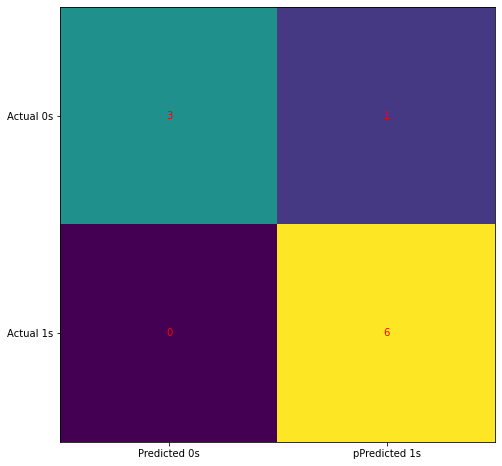

In [65]:
#visualisasi confusion matriks

from sklearn.metrics import plot_confusion_matrix

cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0,1), ticklabels=('Predicted 0s', 'pPredicted 1s'))
ax.yaxis.set(ticks=(0,1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

In [66]:
#laporan klasifikasi lbh lgkp

print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           1       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10



In [67]:
#improve the model

model = LogisticRegression(solver='liblinear', C=10.0, random_state=0)
model.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [68]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, 
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                  random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                  warm_start=False)

LogisticRegression(random_state=0, solver='liblinear')

In [69]:
print(model.intercept_, model.coef_)

[-3.51335372] [[1.12066084]]


In [70]:
print(model.predict_log_proba(x))

[[-2.93615173e-02 -3.54271523e+00]
 [-8.74459450e-02 -2.48013882e+00]
 [-2.47064385e-01 -1.51909643e+00]
 [-6.20323003e-01 -7.71694208e-01]
 [-1.29090376e+00 -3.21614130e-01]
 [-2.20657129e+00 -1.16620816e-01]
 [-3.25015115e+00 -3.95398454e-02]
 [-4.34433723e+00 -1.30650860e-02]
 [-5.45621182e+00 -4.27884072e-03]
 [-6.57399101e+00 -1.39718959e-03]]


In [71]:
print(model.predict(x))

[0 0 0 0 1 1 1 1 1 1]


In [72]:
model.score(x,y)

1.0

In [73]:
confusion_matrix(y, model.predict(x))

array([[4, 0],
       [0, 6]], dtype=int64)

In [74]:
print(classification_report(y, model.predict(x)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



## Logistic Regrssion in Python: Handwriting Recognition ##

In [75]:
#step1: import packages

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [76]:
#step2a: get data

x,y = load_digits(return_X_y=True)

print(x)
print(y)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
[0 1 2 ... 8 9 8]


In [77]:
#step2b: split data

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [78]:
#step2c: scale data

#standardization: proses mengubah data sedemikian rupa shg mean tiap kolom = 0, dan std tiap kolom = 1

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)

In [79]:
#step3: create a model and train it

model = LogisticRegression(solver='liblinear', C=0.05, multi_class='ovr', random_state=0)
model.fit(x_train, y_train)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [80]:
LogisticRegression(C=0.05, class_weight=None, dual=False, fit_intercept=True, 
                   intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='ovr', n_jobs=None,
                   penalty='l2', random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                  warm_start=False)

LogisticRegression(C=0.05, multi_class='ovr', random_state=0,
                   solver='liblinear')

In [81]:
#step4: evaluate the model

x_test = scaler.transform(x_test)
y_pred = model.predict(x_test)

In [82]:
model.score(x_train, y_train)

0.964509394572025

In [83]:
model.score(x_test, y_test)

0.9416666666666667

In [84]:
confusion_matrix(y_test, y_pred)

array([[27,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 32,  0,  0,  0,  0,  1,  0,  1,  1],
       [ 1,  1, 33,  1,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  1, 28,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 29,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 39,  0,  0,  0,  1],
       [ 0,  1,  0,  0,  0,  0, 43,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  2,  0,  0,  0,  1, 33,  0],
       [ 0,  0,  0,  1,  0,  1,  0,  2,  1, 36]], dtype=int64)

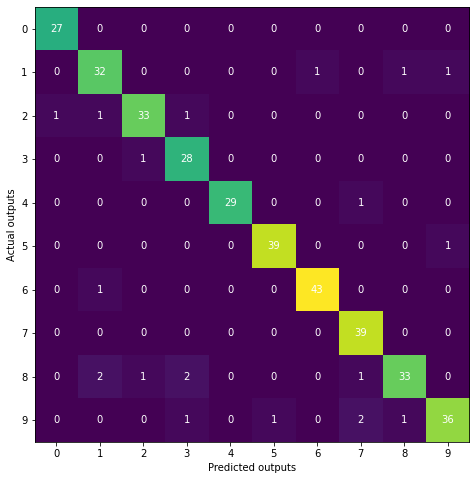

In [85]:
#heatmap yg menggambarkan confusion matriks

cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(cm)
ax.grid(False)
ax.set_xlabel('Predicted outputs', color='black')
ax.set_ylabel('Actual outputs', color='black')
ax.xaxis.set(ticks=range(10))
ax.yaxis.set(ticks=range(10))
ax.set_ylim(9.5, -0.5)
for i in range(10):
    for j in range(10):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()

kita dpt melihat bahwa wrn ungu menunjukan angka kecil spt 0, 1, atau 2. sdgkan hijau & kuning menunjukan angka yg jauh lebih besar (27 keatas).

angka pada diagonal utama (27, 32, ... , 36) mrp jml prediksi yg benar dari test set.

In [86]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        27
           1       0.89      0.91      0.90        35
           2       0.94      0.92      0.93        36
           3       0.88      0.97      0.92        29
           4       1.00      0.97      0.98        30
           5       0.97      0.97      0.97        40
           6       0.98      0.98      0.98        44
           7       0.91      1.00      0.95        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360



# K-Nearest Neighbor (KNN)

## KKN in Python with Sckit-Learn: Ex 1

In [87]:
#defining dataset
#assigning features and label variables

#first features
weather = ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy','Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy']

#second features
temp = ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild']

#label variabel
play = ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']

In [88]:
#encoding data columns: merepresentasikan kolom kategorik dalam kolom numerik

#import labelencoder
from sklearn import preprocessing

#creating labelencoder
le = preprocessing.LabelEncoder()

#converting string labels into numbers
weather_encoded = le.fit_transform(weather)
print(weather_encoded)

[2 2 0 1 1 1 0 2 2 1 2 0 0 1]


In [89]:
#menyandingkan temperatur dan label ke dlm kolom numerik

#convert string labels into numbers
temp_encoded=le.fit_transform(temp)

label=le.fit_transform(play)
print(temp_encoded)

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [90]:
#combining features use zip

#combining weather % temp into single listof tuples
features = list(zip(weather_encoded, temp_encoded))
print(features)

[(2, 1), (2, 1), (0, 1), (1, 2), (1, 0), (1, 0), (0, 0), (2, 2), (2, 0), (1, 2), (2, 2), (0, 2), (0, 1), (1, 2)]


In [91]:
#generating model

#pertama, impor modul dan buat classifier object KNN
#lalu, latih model dg train set menggunakan fit() dan prediksi pd test set dg predict()

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=3)

#train model using the training sets
model.fit(features, label)

#predict
predicted = model.predict([[0,2]])

print(predicted)

[1]


pd contoh diatas, kita memberikan input [0,2] dmn 0 berarti cuaca mendung/overcast dan 2 berati suhu sedang/mild. model memprediksi [1] artinya play.

# KNN in Python with Sckit-Learn: KKN with Multiple Labels

In [92]:
#loading data

from sklearn import datasets

wine = datasets.load_wine()

In [93]:
#exploring data

print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [94]:
#print the label species

print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [95]:
#periksa 5 record teratas

print(wine.data[0:5])

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]]


In [96]:
print(wine.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [97]:
print(wine.data.shape)

(178, 13)


In [98]:
print(wine.target.shape)

(178,)


In [99]:
#split data

from sklearn.model_selection import train_test_split

#split dataset into training set dan test set
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3)

In [100]:
#generating model for K=5

from sklearn.neighbors import KNeighborsClassifier

#create KNN classiefier
knn = KNeighborsClassifier(n_neighbors=5)

#train 
knn.fit(X_train, y_train)

#predict
y_pred = knn.predict(X_test)

In [101]:
#model evaluation for K=5

from sklearn import metrics

#model accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7037037037037037


didapat tingkat klasifikasi 0.70%

In [102]:
#generating model for K=7
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [103]:
#model evaluation for k=7
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7222222222222222


In [104]:
#mencari tahu nilai k yang optimal

error = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Mean')

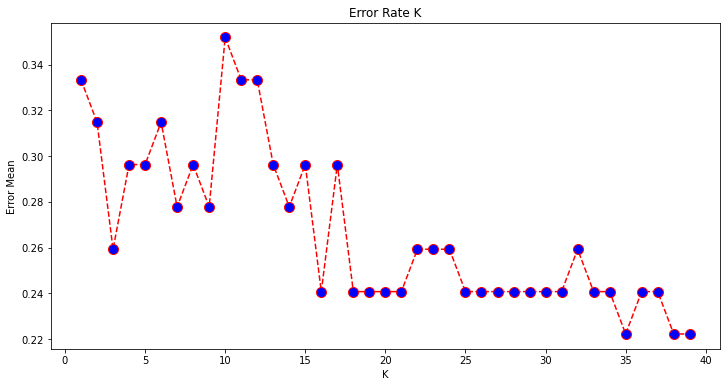

In [105]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error Mean')

error terkecilnya 0.23 di titik 35

In [108]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=35)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7777777777777778
